# Assignment: Exploratory Data Analysis
### `! git clone https://github.com/DS3001/visualization`
### Do Q1 or Q2 or Q3, and Q4. You might want to refer to your work for the data wrangling assignment.

In [2]:
! git clone https://github.com/DS3001/visualization

fatal: destination path 'visualization' already exists and is not an empty directory.


**Q1.** This question provides some practice doing exploratory data analysis and visualization.

The "relevant" variables for this question are:
  - `level` - Level of institution (4-year, 2-year)
  - `aid_value` - The average amount of student aid going to undergraduate recipients
  - `control` - Public, Private not-for-profit, Private for-profit
  - `grad_100_value` - percentage of first-time, full-time, degree-seeking undergraduates who complete a degree or certificate program within 100 percent of expected time (bachelor's-seeking group at 4-year institutions)

1. Load the `./data/college_completion.csv` data with Pandas.


In [3]:
#1
import numpy as np
import pandas as pd
import seaborn as sns

df = pd.read_csv("/content/visualization/assignment/data/college_completion.csv")


2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
> The data has 3798 rows/observations and 63 columns. Some variables included are city, state, level, etc.


In [4]:
#2
df.shape # 3798 rows/observations and 63 columns
df.columns.tolist() # list of available variables
df.head() # variables include city, state, level

,index,unitid,chronname,city,state,level,control,basic,hbcu,flagship,...,vsa_grad_after6_transfer,vsa_grad_elsewhere_after6_transfer,vsa_enroll_after6_transfer,vsa_enroll_elsewhere_after6_transfer,similar,state_sector_ct,carnegie_ct,counted_pct,nicknames,cohort_size
0,0,100654,Alabama A&M University,Normal,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,...,36.4,5.6,17.2,11.1,232937|100724|405997|113607|139533|144005|2285...,13,386,99.7|07,NaN,882.0
1,1,100663,University of Alabama at Birmingham,Birmingham,Alabama,4-year,Public,Research Universities--very high research acti...,NaN,NaN,...,NaN,NaN,NaN,NaN,196060|180461|201885|145600|209542|236939|1268...,13,106,56.0|07,UAB,1376.0
2,2,100690,Amridge University,Montgomery,Alabama,4-year,Private not-for-profit,Baccalaureate Colleges--Arts & Sciences,NaN,NaN,...,NaN,NaN,NaN,NaN,217925|441511|205124|247825|197647|221856|1353...,16,252,100.0|07,NaN,3.0
3,3,100706,University of Alabama at Huntsville,Huntsville,Alabama,4-year,Public,Research Universities--very high research acti...,NaN,NaN,...,0.0,0.0,0.0,0.0,232186|133881|196103|196413|207388|171128|1900...,13,106,43.1|07,UAH,759.0
4,4,100724,Alabama State University,Montgomery,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,...,NaN,NaN,NaN,NaN,100654|232937|242617|243197|144005|241739|2354...,13,386,88.0|07,ASU,1351.0


3. Cross tabulate `control` and `level`. Describe the patterns you see.
> I see that there are more public 2-year universities than private 2-year universities in this dataset. Also, private not-for-profit unis are typically 4-year unis than 2-year unis and as are private for-profit unis to a lesser degree.

In [5]:
#3
pd.crosstab(df['control'], df['level'])


level,2-year,4-year
control,,
Private for-profit,465,527
Private not-for-profit,68,1180
Public,926,632


4. For `grad_100_value`, create a histogram, kernel density plot, boxplot, and statistical description.


<Axes: >

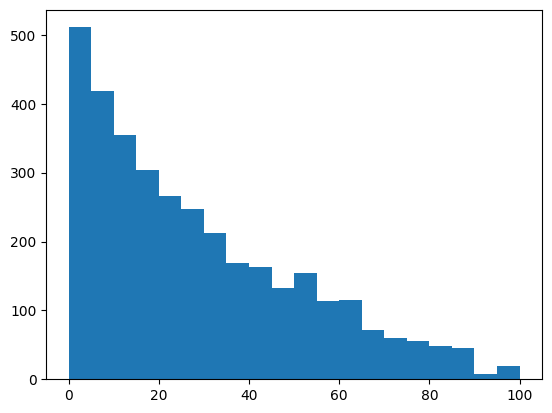

In [6]:
#4
var = 'grad_100_value'
df[var].hist(bins=20, grid=False) # histogram

<Axes: xlabel='grad_100_value', ylabel='Density'>

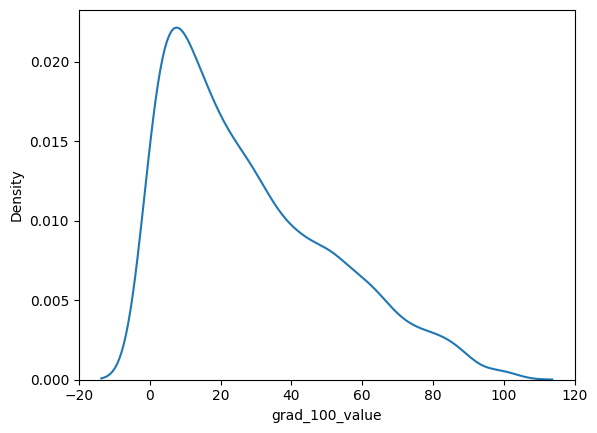

In [7]:
sns.kdeplot(df[var]) #kernel density plot

<Axes: >

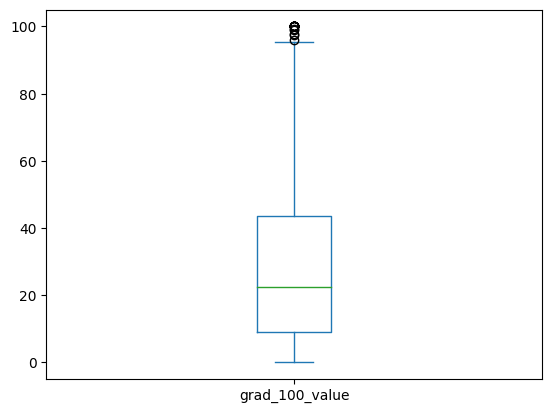

In [8]:
df[var].plot.box() # box plot

In [9]:
descr = df[var].describe() # statistical description
print(descr,'/n')

# Computing the Variance:
std = descr[2] # Accessing the standard deviation from the description object
var = std**2
print('Variance: ', var,'\n')

# Computing the IQR:
thirdQ = descr[6] # Getting the 75% percentile
firstQ = descr[4] # Getting the 25% percentile
IQR = thirdQ - firstQ # Computing the IQR
print('IQR: ', IQR)

count    3467.000000
mean       28.364465
std        23.312730
min         0.000000
25%         9.000000
50%        22.500000
75%        43.650000
max       100.000000
Name: grad_100_value, dtype: float64 /n
Variance:  543.4833820203381 

IQR:  34.650000000000006


5. For `grad_100_value`, create a grouped kernel density plot by `control` and by `level`. Describe what you see. Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `grad_100_value` by `level` and `control`. Which institutions appear to have the best graduation rates?
> I noticed that the percent of students completing degree w/in 100% of time is typically towards the greater range for private-not-for-profit unis. On top of that, the lowest percent of students completing degree w/in 100% of time is in public unis. Overall, graduation rates appear to be best for private-not-for-profits, followed by private for-profits, followed by public unis.

<Axes: ylabel='Density'>

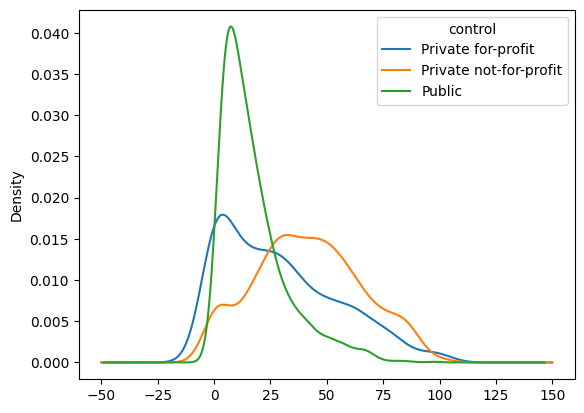

In [10]:
#5
group_by = 'control'
var = 'grad_100_value'
df_wide = df.pivot(columns=group_by,values=var)
df_wide.plot.density()

<Axes: ylabel='Density'>

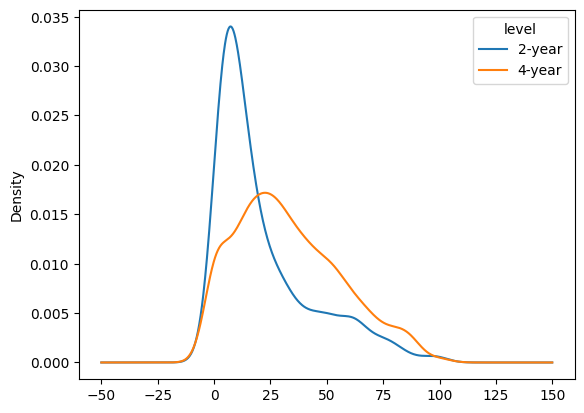

In [11]:
group_by = 'level'
df_wide = df.pivot(columns=group_by,values=var)
df_wide.plot.density()
# lower percent of students completing degree w/in 100% of time for  2-year uni than for 4-year uni typically
# percent of students completeing degree w/in 100% of time is skewed towards upper range for 4-year unis, which appear to have better graduation rates


6. Create a new variable, `df['levelXcontrol']=df['level']+', '+df['control']` that interacts level and control. Make a grouped kernel density plot. Which institutions appear to have the best graduation rates?
> The institutions appearing to have best grad rates are 2 year and 4 year private-not-for profit and 2 year private for-profit.


<Axes: ylabel='Density'>

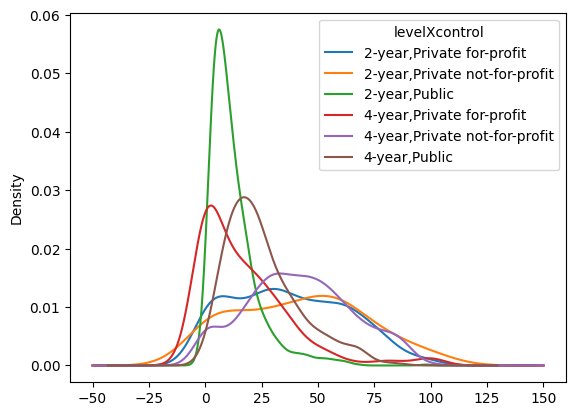

In [12]:
#6
df['levelXcontrol']=df['level']+','+df['control']
group_by = 'levelXcontrol'
df_wide = df.pivot(columns=group_by,values=var)
df_wide.plot.density()


7. Make a kernel density plot of `aid_value`. Now group your graph by `level` and `control`. What explains the shape of the graph? Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `aid_value` by `level` and `control`.
> The peak near 0-10000 is due to both 2-year and 4-year public unis and 4 year private for-profit unis. The hump near 10000-20000 is due to all other unis typically giving aid around these values.

<Axes: ylabel='Density'>

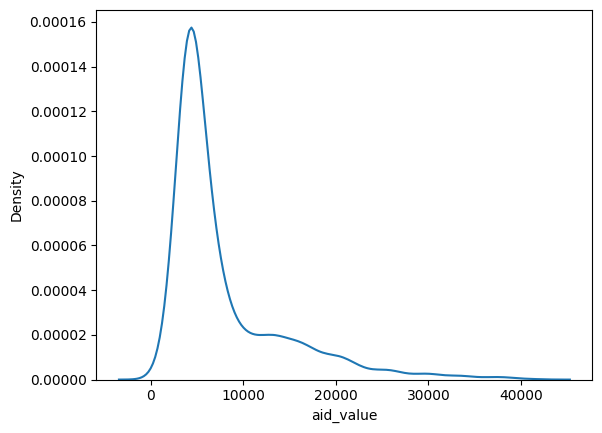

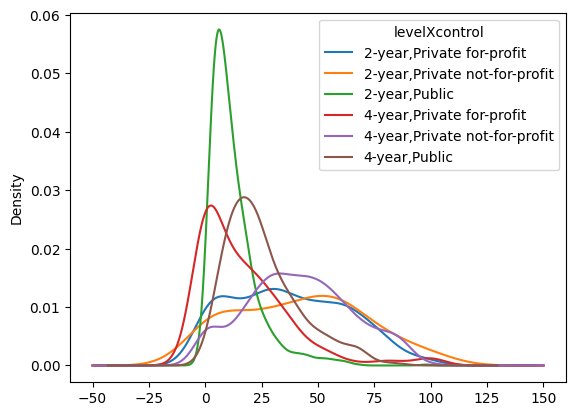

In [13]:
#7
sns.kdeplot(df["aid_value"])
df_wide = df.pivot(columns=group_by,values=var)
df_wide.plot.density()



8. Make a scatterplot of `grad_100_value` by `aid_value`. Describe what you see. Now make the same plot, grouping by `level` and then `control`. Describe what you see. For which kinds of institutions does aid seem to increase graduation rates?
> I see that as aid value increases, graduation rates typically increase, though many given no aid also have high graduation rates. 4 year unis typically give more aid than 2 years which usually give less than 100000 in aid. For 4-year unis, the more aid given seems to be connected to improved graduation rates.
> Also, private for-profit unis typically recieve the least aid followed by public unis than private not-for-profit unis. For private not-for-profit unis, the more aid given seems to be connected to improved graduation rates.

<Axes: xlabel='aid_value', ylabel='grad_100_value'>

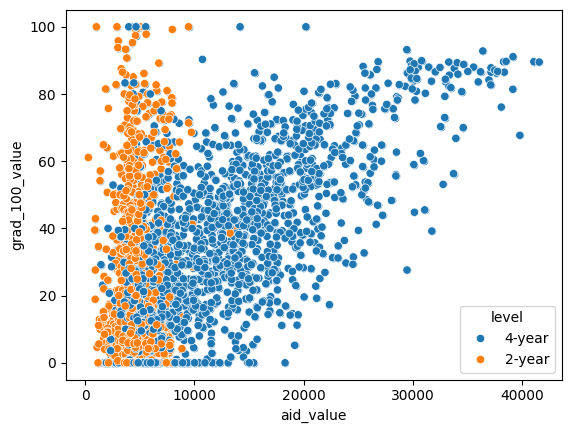

In [14]:
df.plot.scatter(y=var,x='aid_value')
sns.scatterplot(data=df, y=var, x="aid_value", hue="level")


<Axes: xlabel='aid_value', ylabel='grad_100_value'>

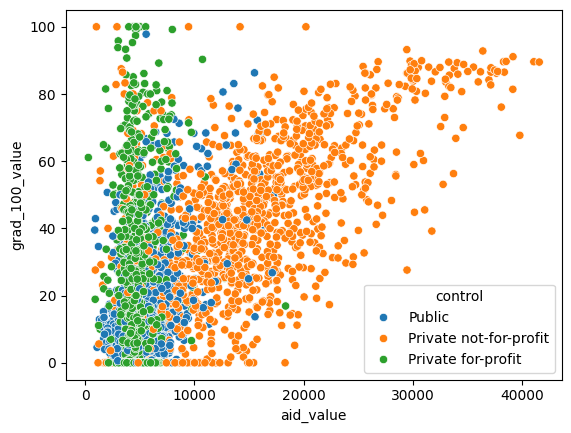

In [15]:
sns.scatterplot(data=df, y=var, x="aid_value", hue="control")


**Q4.** Go to https://data.cms.gov/search.
1. Pick a dataset about something you are interested in. Download the data and data dictionary. If you really can't decide, you can always use this one: https://data.cms.gov/medicare-current-beneficiary-survey-mcbs/medicare-current-beneficiary-survey-data

> Will be using dataset about Medicare COVID-19 Hospitalization Trends Report
https://data.cms.gov/covid-19/medicare-covid-19-hospitalization-trends


In [156]:
#1
from google.colab import drive
drive.mount('/content/gdrive')
mdf = pd.read_csv("gdrive/My Drive/COVID-19 Hospitalization Trends Report Data File - Claims thru 06.30.2023.csv", low_memory = False)
print(mdf.shape)
print(mdf.dtypes)
print(mdf.columns[1:5])
mdf.head()

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
(62702, 19)
Year                          int64
Month                        object
Bene_Geo_Desc                object
Bene_Mdcd_Mdcr_Enrl_Stus     object
Bene_Race_Desc               object
Bene_Sex_Desc                object
Bene_Mdcr_Entlmt_Stus        object
Bene_Age_Desc                object
Bene_RUCA_Desc               object
Total_Hosp                  float64
Total_Enrl                  float64
Total_Hosp_Per100K          float64
Avg_LOS                     float64
Pct_Dschrg_SNF              float64
Pct_Dschrg_Expired          float64
Pct_Dschrg_Home             float64
Pct_Dschrg_Hspc             float64
Pct_Dschrg_HomeHealth       float64
Pct_Dschrg_Other            float64
dtype: object
Index(['Month', 'Bene_Geo_Desc', 'Bene_Mdcd_Mdcr_Enrl_Stus', 'Bene_Race_Desc'], dtype='object')


,Year,Month,Bene_Geo_Desc,Bene_Mdcd_Mdcr_Enrl_Stus,Bene_Race_Desc,Bene_Sex_Desc,Bene_Mdcr_Entlmt_Stus,Bene_Age_Desc,Bene_RUCA_Desc,Total_Hosp,Total_Enrl,Total_Hosp_Per100K,Avg_LOS,Pct_Dschrg_SNF,Pct_Dschrg_Expired,Pct_Dschrg_Home,Pct_Dschrg_Hspc,Pct_Dschrg_HomeHealth,Pct_Dschrg_Other
0,2020,Overall,National,All,All,All,All,All,All,986590.0,6.251189e+07,1578.2437,10.6626,0.1923,0.1804,0.3410,0.0492,0.1526,0.0609
1,2020,Overall,National,All,All,All,All,All,Rural,189268.0,1.206914e+07,1568.1985,9.7568,0.1742,0.1758,0.3737,0.0391,0.1439,0.0673
2,2020,Overall,National,All,All,All,All,All,Urban,794877.0,4.981956e+07,1595.5118,10.8697,0.1966,0.1814,0.3332,0.0516,0.1548,0.0594
3,2020,Overall,National,All,All,All,All,All,Unknown,NaN,8.223233e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020,Overall,National,All,All,All,All,0-64,All,130580.0,8.319817e+06,1569.5056,11.8765,0.1472,0.1198,0.4783,0.0146,0.1301,0.0735


2. Does the data dictionary document how missings are handled? For categorical variables, does it describe the possible values and missing value codes? For the numeric variables, does it describe how missing values are handled? Summarize your opinion of the data dictionary.
> I think the data dictionary was well documented though I noticed some errors with the capitalization of variable names. I also think it could use a more descriptive definition for some of the variables (e.g.average length of stay is not given a time unit so do not know if days).Additionally, the dictionary does not describe missing values for cateogorical or numerical variables but I noticed there were not a lot of missing values in the data while cleaning.


3. Pick out a few interesting variables, and explain why you find them jointly interesting. Clean those variables, documenting your choices by commenting in the code or in a markdown chunk in a notebook.
4. For the variables you select, make a boxplot for each numeric variable and a bar graph for each categorical variable. Do you see any outliers?


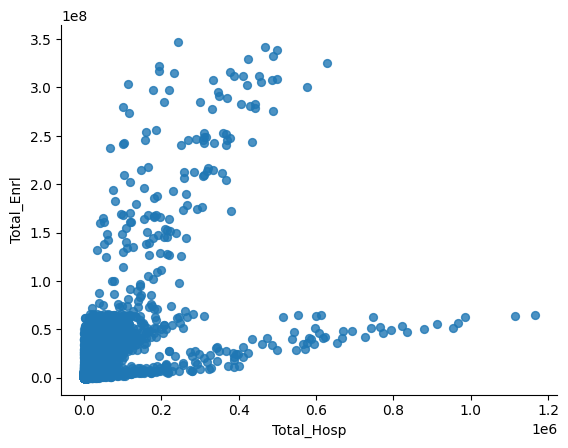

In [84]:
# @title Total_Hosp vs Total_Enrl

from matplotlib import pyplot as plt
mdf.plot(kind='scatter', x='Total_Hosp', y='Total_Enrl', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

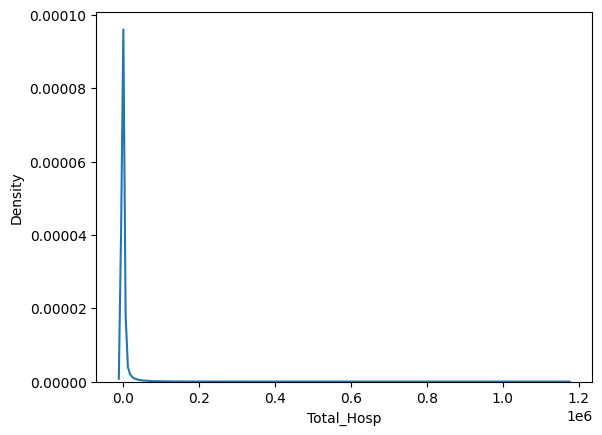

In [150]:
# total COVID-19 Hospitalizations
# Hospitalizations are counted in the month in which the stay began
hosp = mdf["Total_Hosp"]

sns.kdeplot(hosp) #kernel density plot
# noticed long tail in kernel density plot, used arcsinh() to smooth scaling
arc_hosp = np.arcsinh(hosp)

<Axes: xlabel='Total_Hosp', ylabel='Density'>

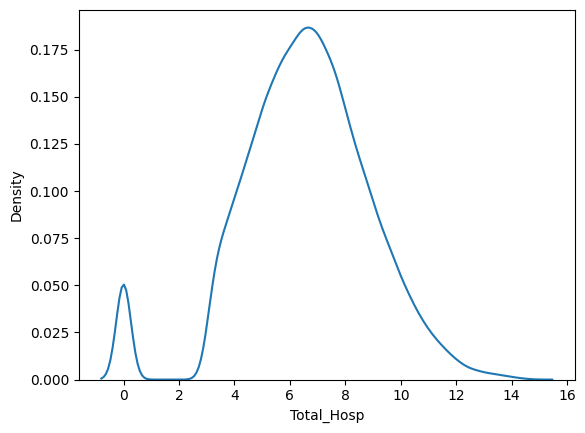

In [138]:
sns.kdeplot(arc_hosp) #kernel density plot of arcsinh total hospitalizations

<Axes: >

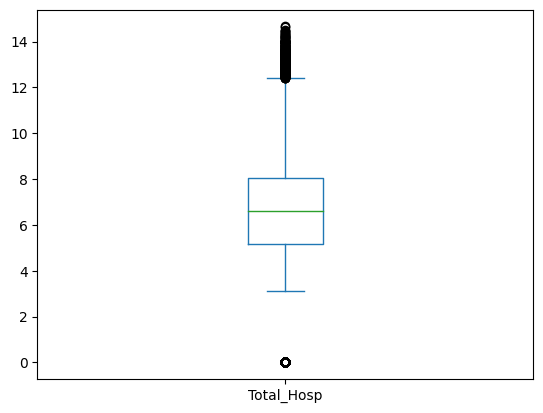

In [151]:
arc_hosp.plot.box() # box plot of arcsinh total hospitalizations
# yes, there are some outliers in the upper range and one in the lower range

<Axes: xlabel='Total_Enrl', ylabel='Density'>

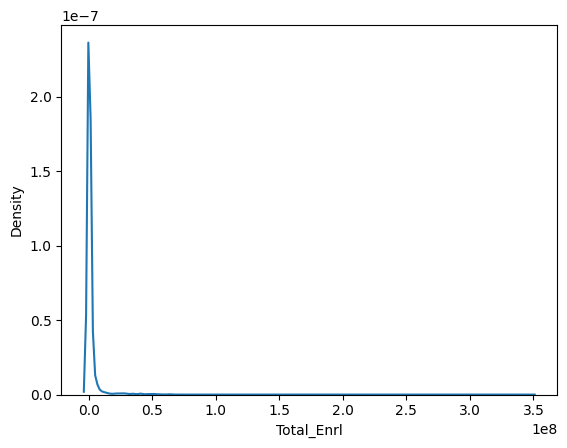

In [142]:
# total Medicare enrollment
totenrl = mdf["Total_Enrl"]
sns.kdeplot(totenrl) #kernel density plot

<Axes: xlabel='Total_Enrl', ylabel='Density'>

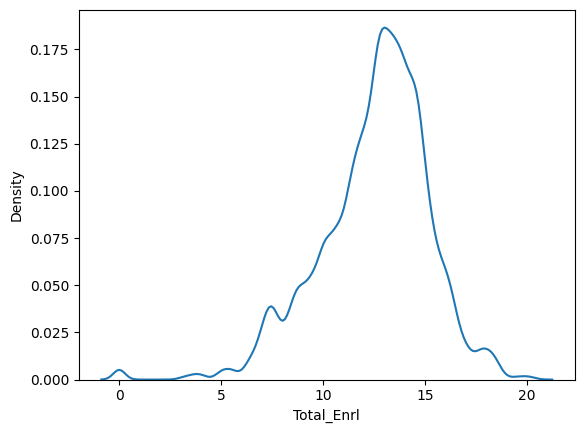

In [141]:

# again values are badly scaled so we will use arcsinh again
arc_enrl = np.arcsinh(totenrl)
sns.kdeplot(arc_enrl) #kernel density plot

<Axes: >

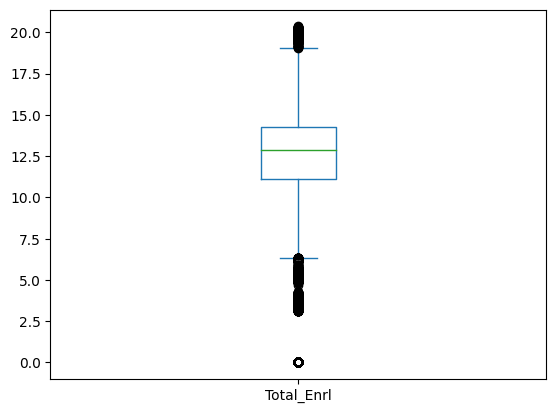

In [143]:
arc_enrl.plot.box() # box plot of arcsinh total hospitalizations
# more outliers in the lower range

5. Create a histogram or kernel density plot, and explain what you see. Do the results require any transformations to rescale them?
> For my histogram of geography, I see that most beneificiaries live in the South followed by the West. I could not visualize all the states in a bar graph so I divided them into regions. As for all my kernel density plots above, I saw that the data was badly scaled to I used the arcsinh() of the data to better see any patterns in the data. After the transformation, the total hospitalization peaked around 10 and the total enrollment peaked around 13.


<Axes: >

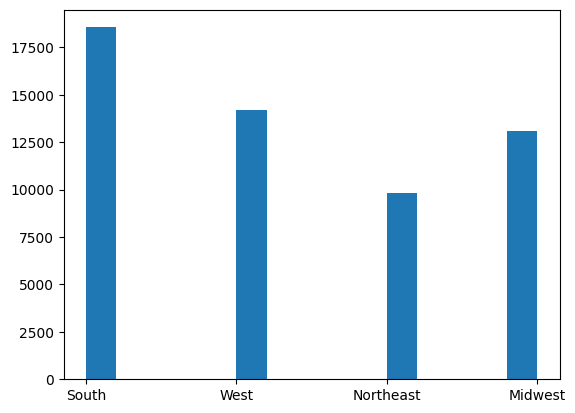

In [146]:
# states of beneficiaries
state = mdf["Bene_Geo_Desc"]
# cannot visualize all states in a bar graph so will divide them into regions

# drop values of other bc not an interstate region classification
state = state.replace(['Puerto Rico', 'Territories', 'Virgin Islands', "National"], "Other")
keep = state != "Other"
mdfnew = mdf.loc[keep, :]
state = mdfnew["Bene_Geo_Desc"]

# group states into regions
state = state.replace(['Connecticut','Maine','Massachusetts','New Hampshire','Vermont','Rhode Island','New Jersey', 'New York','Pennsylvania'], "Northeast")
state = state.replace(['Illinois', 'Nebraska','Indiana','Michigan','Ohio','Minnesota', 'Wisconsin','Iowa',
       'Kansas','South Dakota','North Dakota', "Missouri"], "Midwest")
state = state.replace(['Delaware','Florida','Georgia','Arkansas','Oklahoma','Texas','Maryland','Mississippi','Tennessee','Kentucky', 'Louisiana', 'Alabama','South Carolina','North Carolina','District Of Columbia','Virginia','West Virginia'], "South")
state = state.replace(['Alaska', 'Arizona', 'Montana', 'California','Utah','Washington', 'Wyoming','Oregon', 'Colorado','Hawaii', 'Idaho', 'New Mexico', 'Nevada'], "West")
state.unique()
state.hist(bins = 15, grid = False) # histogram
# most beneificiaries live in the South followed by the West

6. Create a scatter plot, and describe the relationship you see.
> For my scatterplot, I compared counts of Medicare enrollment v. counts of hospitalization, but higher counts of enrollment do not necessarily have a relationship with high counts of  hospitalizations. The highest counts of enrollment just have moderate counts of hospitalization.

<Axes: xlabel='Total_Hosp', ylabel='Total_Enrl'>

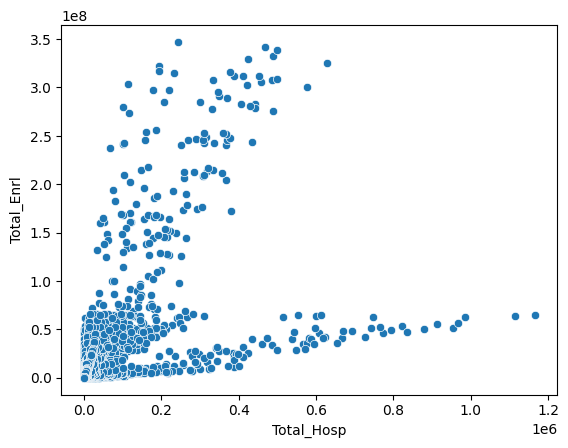

In [147]:
# scatterplot of total Medicare Population v. Total COVID-19 hospitalizations
sns.scatterplot(data=mdf, y=totenrl, x=hosp)

<Axes: >

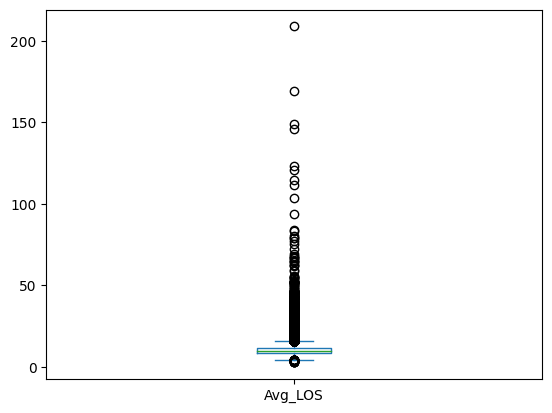

In [160]:
# average length of stay
# analyzed length of stay to see out on average how much time beneficiaries spend in the hospital
los = mdf["Avg_LOS"]
los.plot.box()

7. Create a table (cross tabulation, variance-covariance, or a `.describe()` five-number summary), and explain what you see.
> The mean of average length of stays of Medicare COVID-19 hospitalizations is around 10 (days?) with a standard deviation of around 4.

In [161]:
descr = los.describe() # statistical description
print(descr,'/n')

# Computing the Variance:
std = descr[2] # Accessing the standard deviation from the description object
var = std**2
print('Variance: ', var,'\n')

# Computing the IQR:
thirdQ = descr[6] # Getting the 75% percentile
firstQ = descr[4] # Getting the 25% percentile
IQR = thirdQ - firstQ # Computing the IQR
print('IQR: ', IQR)


count    48448.000000
mean        10.451577
std          3.966936
min          2.647100
25%          8.609600
50%          9.893900
75%         11.392900
max        208.714300
Name: Avg_LOS, dtype: float64 /n
Variance:  15.736578121891277 

IQR:  2.7832999999999988
